# Hand Written Digit Recognition from MNIST dataset using Deep Neural Networks

> Image Classification is best done with a convolution neural network. We will look at convolutional neural networks in the next post but for now let's try and classify the images with a regular deep neural network and see the results for better understanding.


* We will load the training and testing images from MNIST first.
* Then display them on to a grid so that we can have a chance to witness the vareity of digits in each class.
* After that we'll need to prepare our data for training by reshaping it into specific format and then normalizing it.
* Then we start training the data. "Remember that the training data set is used to train the neural network to obtain the approriate parameters."

In [77]:
# Imports
# Make sure to install tensorflow and keras
# Sequential allows to define nueral model
# Dense allows us to connect preceeding layers in the network to subsequent layers creating a fully connected layer network
# Adam optimizer as we are dealing with multi-class classification. So we must use one hot encodeing too
# to_categorical for One hot encoding. Required for multi-class classification

import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [78]:
# To get same data whenever called

np.random.seed(0)

In [79]:
# importing training data to obtain the parameters and test data to evaluate the performance of the neural network.
# mnist.load_data imports 60000 images with labels into training data and 10000 images into testing data.
# Each image in the dataset is 28px wide and 28px height i.e each image has 784 pixels.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [80]:
# (dataset size, width, height) is the output

print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0]) # no.of labels

(60000, 28, 28)
(10000, 28, 28)
60000


In [81]:
# assert func takes in a single argument, the argument is just a condition that is either True or False.
# If the condition is true then the code runs smoothly otherwise print a string
# Using this func is a good practice as it helps debug a complex problem
# NOTE: The no.of training images must be equal to the no.of labels for consistency

# Conditions to be satisfied:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

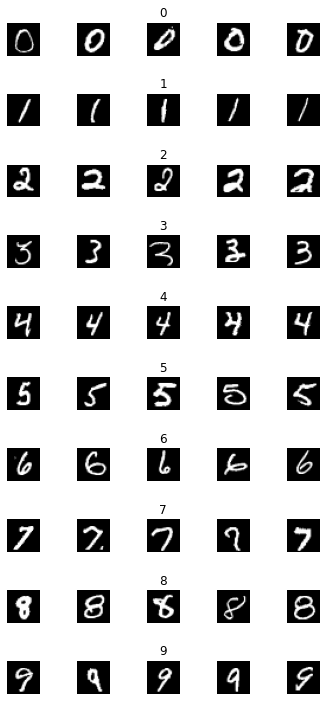

In [82]:
# Visulalize the no.of images in each class (from 0 to 9)

# array to record no.of images in each of our ten categories
num_of_samples = []

# we'll create a grid arrangement to help us visualize. Our grid will contain 10 rows, 0 to 9, in each row we'll have 5 columns of images
cols = 5
num_classes = 10

# subplots allow you to display multiple plots on the same figure. It also returns tuples which contains 2 values, an instance of our figure and plot axis.
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()  # To avoid overlapping of plots

# We are going to loop through every single column and for each column iteration we will iterate through every row or in this case every class we do this by creating a nested for loop arrangement that cycles through our data and counts it up.
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray")) # random images from the dataset are shown to see how different the digits are in the same class.
        axs[j][i].axis("off") # To remove axis
#         Adding titles to each row like 0,1,2,3,....,9
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

No.of Samples: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

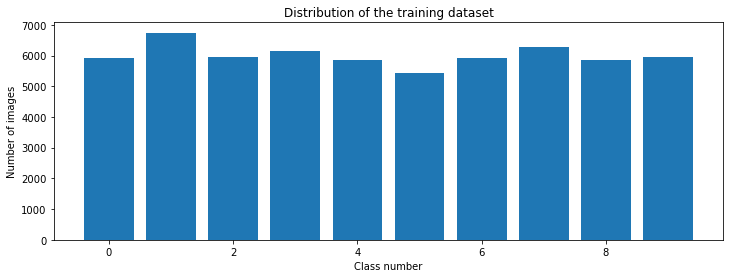

In [83]:
print("No.of Samples:", num_of_samples) # shows the no.of images belonging to each class

# Lets visualize this with bar plots
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [84]:
# Preparing our data to use it in training

# First perform One hot encoding on train and test data, which is necessary for multi class classification.
y_train = to_categorical(y_train, 10) # (labels to encode, total no.of classes)
y_test = to_categorical(y_test, 10)

In [85]:
# Normalize the data
# We choose to divide by 255 because we want to normalize our data to be in a range between 0 and 1.
# This ensures that the max pixel value 255 is normalized down to the max value of 1.
# This normalization process is important as it scales down our features to a uniform range and decreases variance among our data. We need to ensure that our data has low variance. Helps to learn more clearly and accurately.

X_train = X_train/255 
X_test = X_test/255

In [86]:
# flattening the data

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("training data", X_train.shape)
print("testing data", X_test.shape)

training data (60000, 784)
testing data (10000, 784)


## Note:
> Image Classification is best done with a convolution neural network. We will look at convolutional neural networks in the next post but for now let's try and classify the images with a regular deep neural network and see the results for better understanding.

Keep in mind that the images from the MNIST dataset have relatively small 28 by 28 dimensionality of narmalized values.

image2

And since they are graysclae images we only have a single channel of pixel intensity values. In this case the images that we are dealing with are indeed comptationally manageable by feedforward neural network. However, what if we are dealing with RGB images? 72pixels wide by 72 pixels high.

image3

which corresponds to 5184 pixel intensity values. And since we arre dealing with a 3 channel colored image multiplying that by no.of channel we get 15552 weights parameterizing each node in the hidden layer and taking into account how many inputs we have and computantional complexity we would have to increase the number of hidden layers and neurons in each layer as such we just wouldn't have enough computational power to train the size of neural network.

image4

This is why we use cnovolutional neural networks which makes processing more computationally manageable. we will take about these in next post, for now lets have a look at deep neural network.

In [87]:
# using model.add we can add any number of hidden layers.
# As you know we must now learn to classify b/w various hand written digits and this is best done with a deep neural network with many nodesin the hidden layers.
# The more nodes we have the more they are trained to combine into one another with various wweights and bias values which will eventually form more complex models that will classify our hand written digits with some accuracy
# We use softmax activation function and Multicross entropy and learning rate=0.01
# relu is a non-linear activation function. we'll discuss about this in convolution networks post.

def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [88]:
model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


## We split our training data into training and validation sets.
- where training set is used to tune the weights and bias
- validation set is used to tune the hyper parameters.

In [89]:
# Try using different epochs and visualize the plots below to observe the overfitting example.

history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/30
270/270 [==============================] - 2s 5ms/step - loss: 0.6397 - accuracy: 0.7961 - val_loss: 0.3350 - val_accuracy: 0.9027
Epoch 2/30
270/270 [==============================] - 1s 4ms/step - loss: 0.3518 - accuracy: 0.8934 - val_loss: 0.2792 - val_accuracy: 0.9133
Epoch 3/30
270/270 [==============================] - 1s 4ms/step - loss: 0.3211 - accuracy: 0.9019 - val_loss: 0.2902 - val_accuracy: 0.9145
Epoch 4/30
270/270 [==============================] - 1s 4ms/step - loss: 0.3047 - accuracy: 0.9074 - val_loss: 0.2706 - val_accuracy: 0.9190
Epoch 5/30
270/270 [==============================] - 1s 4ms/step - loss: 0.2915 - accuracy: 0.9109 - val_loss: 0.2611 - val_accuracy: 0.9233
Epoch 6/30
270/270 [==============================] - 1s 4ms/step - loss: 0.2822 - accuracy: 0.9146 - val_loss: 0.2481 - val_accuracy: 0.9262
Epoch 7/30
270/270 [==============================] - 1s 4ms/step - loss: 0.2666 - accuracy: 0.9196 - val_loss: 0.2325 - val_accuracy: 0.9257
Epoch 

Text(0.5, 0, 'epoch')

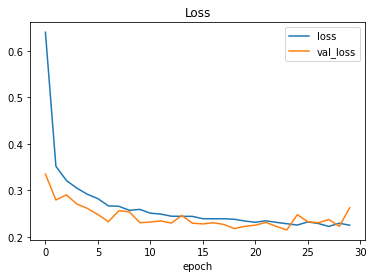

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

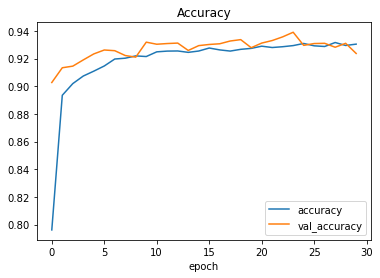

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [92]:
# Testing our model

score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.3001714050769806
Test accuracy: 0.9101999998092651


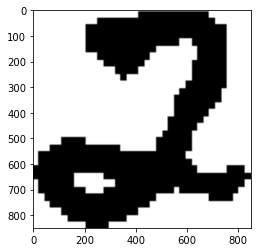

In [93]:
# Testing our model on new external image

import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

resized image shape: (28, 28, 4)
Grayscale image shape: (28, 28)


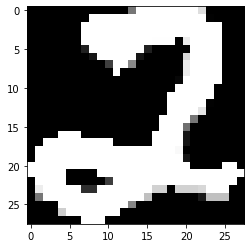

In [94]:
# We need to make the above image into numpy array so that we can modify the image into a 28*28 image which is the required input.
# our neural netwrok is trained on 28*28 image with black background and white pixels. So we convert the above image into required format.
import cv2

array_img = np.asarray(img)
resized_img = cv2.resize(array_img, (28, 28))
print("resized image shape:", resized_img.shape)
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
print("Grayscale image shape:", gray_img.shape)
image = cv2.bitwise_not(gray_img)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [95]:
image = image/255
image = image.reshape(1, 784)

prediction = np.argmax(model.predict(image), axis=-1)
print("predicted digit:", str(prediction))

# Even after adding a hidden layer with 30 nodes our accuracy is low. So we should be using Convolutional neural networks.

predicted digit: [2]
